In [ ]:
# Global/WindowsApps (3.9.13)
!pip3 install --user fredapi
!pip3 install --user matplotlib
!pip3 install --user numpy
!pip3 install --user scipy
!pip3 install --user pandas
!pip3 install --user seaborn
!pip3 install --user sklearn

In [91]:
from fredapi import Fred
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from dateutil import relativedelta


key = os.environ.get('FRED_KEY')
fred = Fred(api_key=key)


In [116]:
def normalize(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    std_df=(df-df.mean())/df.std()
    return std_df

def dual_plot(a,b):
    fig,ax1 = plt.subplots()
    ax1.plot(a,c='darkgray')
    #ax1.set_yscale('log')
    ax2 = ax1.twinx()
    ax2.plot(b,c='goldenrod')
    plt.plot()

def get_next_month(today:datetime):
    nextmonth = today + relativedelta.relativedelta(months=1)
    return nextmonth

date_to_index = lambda x: x.astype('str')
index_to_date = lambda x: pd.to_datetime(x.index)

In [240]:
start= "2004-01-03"
end  = "2022-06-03"

ier   = fred.get_series('T5YIFR',observation_start=start, observation_end=end)
sp500 = fred.get_series('NASDAQ100',observation_start=start, observation_end=end)


In [251]:

def sampling(WINDOW:int):
    score = np.array([])
    len_index = ier.index
    len_index = int(len(len_index)/WINDOW)

    for i in range(len_index):
        _ier   = ier.iloc  [WINDOW*i : WINDOW*(i+1)]
        _sp500 = sp500.iloc[WINDOW*i : WINDOW*(i+1)]
        _ier   = normalize(_ier)
        _sp500 = normalize(_sp500)

        if 0: #i%100==1:
            dual_plot(_sp500,_ier)
        
        df = pd.DataFrame()
        df.index = _ier.index
        df['ier']  = normalize(_ier)
        df['sp500'] = normalize(_sp500)

        score = np.append(score, df.corr().ier.sp500)

    score = pd.Series(score)
    mean_score = round(score.mean(),2)
    print(mean_score)
    return normalize(score)

In [261]:
score_10 = sampling(10)
score_30 = sampling(30)
score_60 = sampling(60)
score_90 = sampling(90)
score_120 = sampling(120)

0.16
0.24
0.25
0.23
0.26


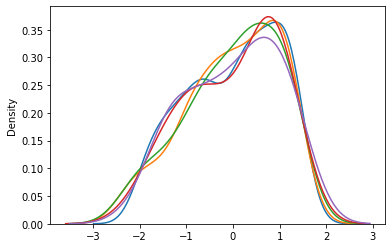

In [279]:
score = score_10
sns.kdeplot(data=score)

score = score_30
sns.kdeplot(data=score)

score = score_60
sns.kdeplot(data=score)

score = score_90
sns.kdeplot(data=score)

score = score_120
kde = sns.kdeplot(data=score)

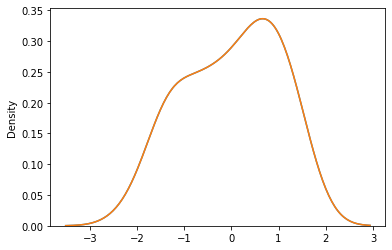

In [452]:
kde = sns.kdeplot(score)
line = kde.lines[0]
X, y = line.get_data()
plt.plot(X,y)

-3.50951116334609
0.0002435071775377503
(2, 200)


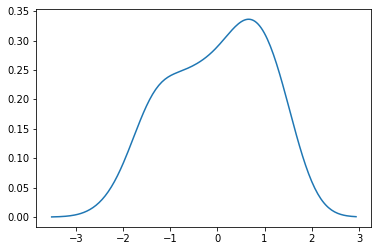

In [480]:
import numpy as np
from sklearn.mixture import GaussianMixture


print(X[0])
print(y[0])

a = np.column_stack([X, y]).T
print(a.shape)
plt.plot(a[0,:], a[1,:])
#a = np.concatenate([X.T,y.T],axis=1)
#print(a.shape)
GMM = GaussianMixture(n_components=2, max_iter=1000,covariance_type='full').fit(a)

In [481]:
mean =GMM.means_  
covs  = GMM.covariances_
weights =GMM.weights_


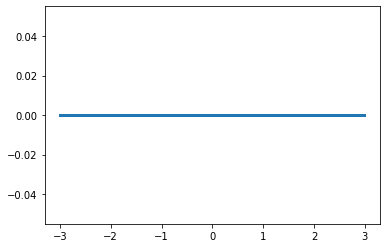

In [482]:
from scipy.stats import norm
x = np.arange(-3,3,0.01)
y_axis0 = norm.pdf(x, float(mean[0][0]), np.sqrt(float(covs[0][0][0])))*weights[0] # 1st gaussian
#y_axis1 = norm.pdf(x, float(mean[1][0]), np.sqrt(float(covs[1][0][0])))*weights[1] # 2nd gaussian

# plt.plot(x, norm(GMM.means_[0,0],np.sqrt(GMM.covariances_[0,0])).pdf(x))
# plt.plot(x, norm(GMM.means_[1,0],np.sqrt(GMM.covariances_[0,1])).pdf(x))
plt.plot(x,y_axis0,lw=3)
#plt.plot(x,y_axis1,lw=3)